TODO:
- scan over N=100, ..., 1000000 to show convergence of covariance matrix
- visualise all 6 rows (superimposed Gaussians); draw tables summarising results
- mean +- sigma NEW vs ORIGINAL data

In [1]:
# useful visualisation and numerical tools
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set();

### Part 1
##### The Box-Muller transform:

$\left\{
    \begin{array}{ll}
        z_1 = \sqrt{-2\log{u_1}} \cos{(2\pi u_2)} \\
        z_2 = \sqrt{-2\log{u_1}} \sin{(2\pi u_2)}, 
    \end{array}
\right.$
with $u_1, u_2$ ~ U(0,1).

**Derivation**

Let us denote $y_1 = y_1(u_1) = \sqrt{-2\log{u_1}}$, $y_2 = y_2(u_2) = \cos{(2\pi u_2)}$, and $y_3 = y_3(u_2) = \sin{(2\pi u_2)}$. Then the Box_Muller transform can be expressed as:
$\left\{
    \begin{array}{ll}
        z_1 = y_1(u_1) y_2(u_2) \\
        z_2 = y_1(u_1) y_3(u_2), 
    \end{array}
\right.$
with $0 \leq y_1 \leq +\infty$ and $-1 \leq y_2, y_3 \leq 1$.

Note that $z_1$ and $z_2$ are products of independent random variables (what stems from independence of $u_1$ and $u_2$). Therefore, the *Mellin Convolution* is applicable here and we may compute p.d.f.'s of $z_1$ and $z_2$ as:

$$f_{z_1}(z_1) = \int\limits_{-\infty}^{+\infty} f_{y_1}(y_1) f_{y_2}\left(\frac{z_1}{\left|y_1\right|}\right) \, \frac{dy_1}{\left|y_1\right|} $$

$$f_{z_2}(z_2) = \int\limits_{-\infty}^{+\infty} f_{y_1}(y_1) f_{y_3}\left(\frac{z_2}{\left|y_1\right|}\right) \, \frac{dy_1}{\left|y_1\right|} $$.

In order to calculate the above we will derive p.d.f.'s of $y_1$, $y_2$ and $y_3$.
To do so we will apply the method of direct transformation of p.d.f., which transforms $f_x(x)$ into $f_y(y)$ with $y=g(x)$ as follows:
$$ f_y(y) = \sum\limits_{i=1}^{N} \frac{f_x(x^{(i)}(y))}{\left|g'(x^{(i)}(y))\right|},$$
with summation over all $N$ real roots of $g(x) = y$.

However, if the $g(x)$ is invertible so that $g^{-1}(x) = h(y)$ the formula simplifies to:
$$ f_y(y) = f_x\left(h(y)\right) \left|h'(y)\right|.$$

**In the case of $y_1 = y_1(u_1) = \sqrt{-2\log{u_1}}$**, which is invertible we apply the above formula:
$$ f_y(y_1) = f_{u_1}\left(h(y_1)\right) \left|h'(y_1)\right|.$$

We immediately get $h(y_1) = e^{-\frac{1}{2}y_1^2}$ and $h'(y_1) = -y_1e^{-\frac{1}{2}y_1^2}.$
Also noting that $f_{u_1}(h_{y_1})$ does not vanish for any $y_1$, because $f_{u_1}(h(y_1)) = 1 \iff 0 \leq e^{-\frac{1}{2}y_1^2} \leq 1 \iff y_1^2 \geq 0 \iff -\infty \leq y_1 \leq +\infty$.
We obtain:

$f_{y_1}(y_1) =         y_1 e^{-\frac{1}{2}y_1^2} \mbox{ for } -\infty \leq y_1 \leq +\infty$.

**In the case of $y_2 = y_2(u_2) = \cos{(2\pi u_2)}$** we deal with a non-invertible function. The $g(u_2) = \cos{(2\pi u_2)}$ has two roots:
- $u_2^{(1)} = \frac{1}{2\pi} \arccos{y_2} \mbox{  with }-1 \leq y_2 \leq 1,$
- $u_2^{(2)} = 1 - \frac{1}{2\pi} \arccos{y_2} \mbox{  with } -1 \leq y_2 \leq 1.$

The both roots yield $f_{u_2}(u_2^{(i)}) = 1$.
Computing the derivatives gives $g'(u_2^{(i)}) = -2\pi\sin{2\pi u_2^{(i)}}$ which equals:
- $g'(u_2^{(1)}) = -2\pi\sin{\arccos{y_2}} = -2\pi \sqrt{1-y_2^2},$
- $g'(u_2^{(2)}) = -2\pi\sin{2\pi - \arccos{y_2}} = 2\pi \sqrt{1-y_2^2}$

Applying the direct transformation formula we get:

$f_{y_2}(y_2) =
\left\{
    \begin{array}{ll}
        \frac{1}{\pi \sqrt{1-y_2^2}} & \mbox{ for } -1 \leq y_2 \leq 1, \\
        0 & \mbox{ otherwise}. 
    \end{array}
\right.$

**In the case of $y_3 = y_3(u_2) = \sin{2\pi u_2)}$** we also have a non-invertible function.
The roots of  $g(u_2) = \sin{(2\pi u_2)}$ are:
- $u_2^{(1)} = \frac{1}{2\pi} \arcsin{y_3} \mbox{ with } -1 \leq y_3 \leq 1,$
- $u_2^{(2)} = \frac{1}{2\pi} \left( \pi  - \arcsin{y_3} \right) \mbox{ with } -1 \leq y_3 \leq 1.$

The both roots yield $f_{u_2}(u_2^{(i)}) = 1$.
Computing the derivatives gives $g'(u_2^{(i)}) = 2\pi\cos{2\pi u_2^{(i)}}$ which equals:
- $g'(u_2^{(1)}) = 2\pi\cos{\arccos{y_3}} = 2\pi \sqrt{1-y_3^2},$
- $g'(u_2^{(1)}) = 2\pi\cos \left( {\pi - \arccos{y_3}} \right)= -2\pi \sqrt{1-y_3^2}.$

Applying the direct transformation formula we get:

$f_{y_3}(y_3) = $
$\left\{
    \begin{array}{ll}
        \frac{1}{\pi \sqrt{1-y_3^2}} & \mbox{ for } -1 \leq y_3 \leq 1, \\
        0 & \mbox{ otherwise}. 
    \end{array}
\right.$

Now that we have p.d.f.'s of $y_1$, $y_2$ and $y_3$ we may apply the *Mellin Convolution* as defined at the beginning of this section and get:

$$f_{z_1}(z_1) = \int\limits_{-\infty}^{+\infty} f_{y_1}(y_1) f_{y_2}\left(\frac{z_1}{\left|y_1\right|}\right) \, \frac{dy_1}{\left|y_1\right|} =
\int\limits_{-\infty}^{+\infty} y_1 e^{-\frac{1}{2}y_1^2}  \frac{1}{\pi \sqrt{1-\left(\frac{z_1}{y_1}\right)^2}} \, \frac{dy_1}{\left|y_1\right|} =
\int\limits_{-\infty}^{+\infty} e^{-\frac{1}{2}y_1^2}  \frac{y_1 dy_1}{\pi \sqrt{y_1^2 - z_1^2}}
$$


Let $p = \sqrt{y_1^2 - z_1^2}$ and $0 \leq p \leq +\infty \implies dp = \frac{y_1 dy_1}{\sqrt{y_1^2 - z_1^2}}$

Then we have:
$$f_{z_1}(z_1) = \frac{1}{\pi} \int\limits_{0}^{+\infty} e^{-\frac{1}{2}\left(p^2+z_1^2\right)} dp = 
\frac{1}{\pi} e^{-\frac{1}{2}z_1^2}  \int\limits_{0}^{+\infty} e^{-\frac{1}{2}p^2} dp
= \frac{1}{2\pi} e^{-\frac{1}{2}z_1^2} \implies f_{z_1}(z_1) \sim N(0,1)$$


$$f_{z_2}(z_2) = \int\limits_{-\infty}^{+\infty} f_{y_1}(y_1) f_{y_3}\left(\frac{z_2}{\left|y_1\right|}\right) \, \frac{dy_1}{\left|y_1\right|} = \int\limits_{-\infty}^{+\infty} y_1 e^{-\frac{1}{2}y_1^2}  \frac{1}{\pi \sqrt{1-\left(\frac{z_2}{y_1}\right)^2}} \, \frac{dy_1}{\left|y_1\right|} = \frac{1}{2\pi} e^{-\frac{1}{2}z_2^2} \implies f_{z_2}(z_2) \sim N(0,1)$$.

Having proven that Box-Muller transform indeed generates random variables $\sim N(0,1)$ let us procede to implementing the transform in the following part.

### Part 2
In order to obtain random variables of generic $\mu$ and $\sigma$ it is sufficient to transform $z_1$ and $z_2$ as follows:

$\left\{
    \begin{array}{ll}
        x_1 = z_1 \sigma_1 + \mu_1 \mbox{ where } x_1 \sim N(\mu_1, \sigma_1^2)\\
        x_2 = z_2 \sigma_2 + \mu_2 \mbox{ where } x_2 \sim N(\mu_2, \sigma_2^2).
    \end{array}
\right.$


### Part 3

The $z_1$ and $z_2$ random variables can be generated by invoking the function below.

In [2]:
def get_box_muller(size=1, mus=(0,0), sigs2=(1,1)):
    """Generate size # of pairs of independent normal random variables of specified mean
       (mus) and variance (sigs2) according to the Box-Muller
       transform"""
#     np.random.seed(42) ## DEBUG
    # ~ U(0,1) sample of shape `size` x 2 (corresponds to u1 and u2)
    u = np.random.random_sample((size, 2))
    R = np.sqrt(-2 * np.log(u[:, 0]))
    z1 = R * np.cos(2 * np.pi * u[:, 1])
    z2 = R * np.sin(2 * np.pi * u[:, 1])    
#     print z1, z2
    return z1 * np.sqrt(sigs2[0]) + mus[0], z2 * np.sqrt(sigs2[1]) + mus[1]
    
z1, z2 = get_box_muller(1000, mus=(1,1), sigs2=(1,1))
zzz = get_box_muller(1000, mus=(1,1), sigs2=(1,1))
print np.shape(zzz)

(2, 1000)


Let us check if this function indeed generates random variables $\sim N(\mu, \sigma^2)$ by histogramming generated data with the next function.

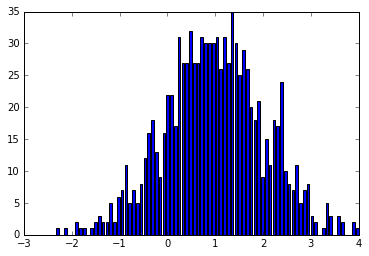

mu =  0.977575137824 sigma =  1.03550152739


In [3]:
def hist(data, Nbins):
    """Histogram array-like 1-D `data` into `Nbins` # of bins"""
    hist, bins = np.histogram(data, bins=Nbins)
    width = 0.7 * (bins[1] - bins[0])  # bar width a bit smaller than bin's (for visual clarity)
    center = (bins[:-1] + bins[1:]) / 2  # midpoints of all bins
    plt.bar(center, hist, align='center', width=width)  # bar chart depicting the histogram
    plt.show()
    
hist(z2, Nbins=80)
print "mu = ", np.mean(z2), "sigma = ", np.std(z2)

By inspecting the histogram by eye and comparing the computed parameters from the generated sample - we see
that our function seems to be consistent with the Box-Muller transform.

##### Monte Carlo simulations 
Now we are to realise $N=100$ MC simulations of a 6-dimensional Gaussian random vector $\textbf{v}$ with mean
$\mu = (0.5, -0.4, 2.1, 0.2, 3.1, -1.0)$ and a given covariance matrix (specified in the subsequent code).

In [24]:
N = 100000  # no. of MC samples
mu_list = [0.5, -0.4, 2.1, 0.2, 3.1, -1.0]
np.random.seed(42) ## DEBUG
v1, v2, v3 = get_box_muller(N), get_box_muller(N), get_box_muller(N)
# print v1,'\n\n',v2,'\n\n',v3

In [25]:
v = np.concatenate((v1, v2, v3), axis=0)
print np.shape(v)


(6, 100000)


In [26]:
print np.mean(v[0, :]), np.mean(v[1, :])
print np.var(v[0, :]), np.var(v[1, :])

-0.00270073661547 -0.00251018126613
0.99864880146 0.995957122624


In [27]:
# Let's visualise obtained distributions of 6 components of v
# plt.hist(v[0], bins=np.linspace(-2,2,100), normed=True, alpha=0.5, label='v0')


In [28]:
### Correlating the data
np.set_printoptions(precision=3)
# Covariance matrix for vector v
C = np.matrix([[.090, .022, .061, .004, .004, .001],
               [.022, .040, .1104, .008, .008, .001],
               [.061, .1104, 2.25, .165, .162, .022],
               [.004, .008, .1650, .090, .088, .012],
               [.004, .008, .1620, .088, .640, .088],
               [.001, .001, .0220, .012, .088, .090]])
print "Demanded covariance matrix C:\n", C, '\n'
C == C.T
L = np.linalg.cholesky(C)
# print "Cholesky L (lower triangular) matrix:\n", L, '\n'
X = np.dot(L, v) + np.reshape(mu_list, newshape=(len(mu_list), 1))
# print "New data: \n", X, 
print "\nNew data covariance matrix:\n", np.cov(X), '\n'
# print "C - cov(X) normalised to C:\n", (C - np.cov(X)) / C
# print '\nCovariance at the start', np.cov(v)
# print '\nand correlation coefficient:', np.corrcoef(v)
# print '\nthe original data `v`:\n', v

# CHECKED OK
print "means and vars for each new data row:"
for row in X:
    print "mean=", np.mean(row), "var=", np.var(row)

# The biggest deviations within order of magnitude!!! and convergent (i.e. for 100k results better than for 10k)

Demanded covariance matrix C:
[[  9.000e-02   2.200e-02   6.100e-02   4.000e-03   4.000e-03   1.000e-03]
 [  2.200e-02   4.000e-02   1.104e-01   8.000e-03   8.000e-03   1.000e-03]
 [  6.100e-02   1.104e-01   2.250e+00   1.650e-01   1.620e-01   2.200e-02]
 [  4.000e-03   8.000e-03   1.650e-01   9.000e-02   8.800e-02   1.200e-02]
 [  4.000e-03   8.000e-03   1.620e-01   8.800e-02   6.400e-01   8.800e-02]
 [  1.000e-03   1.000e-03   2.200e-02   1.200e-02   8.800e-02   9.000e-02]] 


New data covariance matrix:
[[  8.988e-02   2.192e-02   6.170e-02   4.075e-03   3.690e-03   1.156e-03]
 [  2.192e-02   3.983e-02   1.102e-01   8.111e-03   8.403e-03   1.301e-03]
 [  6.170e-02   1.102e-01   2.252e+00   1.658e-01   1.624e-01   2.491e-02]
 [  4.075e-03   8.111e-03   1.658e-01   9.046e-02   8.898e-02   1.256e-02]
 [  3.690e-03   8.403e-03   1.624e-01   8.898e-02   6.400e-01   8.836e-02]
 [  1.156e-03   1.301e-03   2.491e-02   1.256e-02   8.836e-02   9.006e-02]] 

means and vars for each new data ro

In [29]:

### Toy example - generating correlated normal variables
from scipy.stats import norm
Z = norm.rvs(size=(3,10000))
C = np.matrix([[1, .5, .5],
               [.5, 1, .5],
               [.5, .5, 1]])
print C == C.T
L = np.linalg.cholesky(C)
# my_L = cholesky(C)  ## doesn't work yet
# print L == my_L
print L
X = np.dot(L, Z)
print np.cov(X)

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
[[ 1.     0.     0.   ]
 [ 0.5    0.866  0.   ]
 [ 0.5    0.289  0.816]]
[[ 1.011  0.51   0.508]
 [ 0.51   1.017  0.508]
 [ 0.508  0.508  0.999]]


In [30]:
from math import sqrt
 
#TODO: the below seems not to work. Debug it.
def cholesky(A):
    """Performs a Cholesky decomposition of A, which must 
    be a symmetric and positive definite matrix. The function
    returns the lower variant triangular matrix, L."""
    n = len(A)

    # Create zero matrix for L
    L = [[0.0] * n for i in xrange(n)]

    # Perform the Cholesky decomposition
    for i in xrange(n):
        for k in xrange(i+1):
            tmp_sum = sum(L[i][j] * L[k][j] for j in xrange(k))
            
            if (i == k): # Diagonal elements
                # LaTeX: l_{kk} = \sqrt{ a_{kk} - \sum^{k-1}_{j=1} l^2_{kj}}
                L[i][k] = sqrt(A[i][i] - tmp_sum)
            else:
                # LaTeX: l_{ik} = \frac{1}{l_{kk}} \left( a_{ik} - \sum^{k-1}_{j=1} l_{ij} l_{kj} \right)
                L[i][k] = (1.0 / L[k][k] * (A[i][k] - tmp_sum))
    return L